In [ ]:
# Tiểu luận: Lý thuyết Xác suất và Thống kê dành cho Máy học.
# Thông tin tác giả:
## Học viên cao học: Nguyễn Xuân Hiền. Mã học viên: 2470749.
## Người hướng dẫn khoa học: TS Nguyễn An Khương, TS Trần Tuấn Anh.
## Bộ môn: Cơ sở toán. Ngành: Khoa học máy tính.
## Khoa Kỹ thuật và Khoa học máy tính - Trường đại học Bách Khoa TP.Hồ Chí Minh.
## Ghi chú: Mã nguồn này là một bộ phận không thể tách rời của Tiểu luận.
# Lịch sử phiên bản.
## Ngày tạo lập  - 2025-06-01: phát hành phiên bản 1.0.
## Ngày cập nhật - 2025-06-03: phát hành phiên bản 1.1.
### Ví dụ 1: Bổ sung ngôn ngữ tiếng Việt.
### Ví dụ 3: Bổ sung ngôn ngữ tiếng Việt.
# Nguồn tham khảo:
## Lý thuyết về xác suất thống kê: https://d2l.ai/chapter_preliminaries/probability.html

In [ ]:
# Ví dụ 1:
# Tải thư viện
import random
# Đặt số phép thử hay cỡ mẫu
num_tosses = 100
# Tạo thử ngẫu kết quả số lần hiện mặt ngửa (head)
results = [random.choice(['Heads', 'Tails']) for _ in range(num_tosses)]
heads = results.count('Heads')
# Tính kết quả số lần hiện mặt sấp (tail)
tails = num_tosses - heads
# Xuất kết quả ra màn hình.
print(f"Mặt ngửa - Heads: {heads}, Mặt sấp - Tails: {tails}")

Mặt ngửa - Heads: 56, Mặt sấp - Tails: 44


In [ ]:
# Ví dụ 2:
# Tải thư viện
import torch
# Đặt số phép thử hay cỡ mẫu
num_samples = 10000
# Xác suất phép thử công bằng
fair_probs = torch.tensor([0.5, 0.5])
# Tạo 1 mẫu với 10000 lần thử từ phân phối đa thức - Multinomial
counts = torch.distributions.Multinomial(total_count=10000, probs=fair_probs).sample()
# Tính tỷ lệ
probabilities = counts / 10000
print(probabilities)

tensor([0.4955, 0.5045])


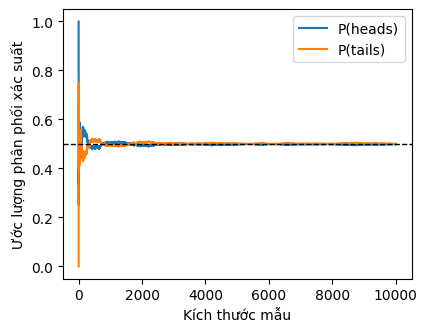

In [ ]:
# Ví dụ 3:
# Tải thư viện
import torch
import matplotlib.pyplot as plt
# Đặt số phép thử hay cỡ mẫu
num_samples = 10000
# Xác suất phép thử công bằng
fair_probs = torch.tensor([0.5, 0.5])
# Lấy mẫu từ phân phối đa thức
counts = torch.multinomial(fair_probs, num_samples, replacement=True)
counts = torch.stack([(counts == i).cumsum(0) for i in range(2)], dim=1).float()
# Ước lượng xác suất
estimates = counts / counts.sum(dim=1, keepdim=True)
estimates = estimates.numpy()
# Biểu diễn bằng đồ thị
plt.figure(figsize=(4.5, 3.5))
plt.plot(estimates[:, 0], label="P(heads)")
plt.plot(estimates[:, 1], label="P(tails)")
plt.axhline(y=0.5, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Kích thước mẫu')
plt.ylabel('Ước lượng phân phối xác suất')
plt.legend()
plt.show()